## Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.


## Attributes

Name -- Data Type -- Measurement -- Description
* Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age(age) -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style('whitegrid') 

In [3]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
concrete_df = pd.read_csv("concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [4]:
concrete_df.shape
#8 features and 1030 rows  - CURSE OF DIMENSIONALITY??

(1030, 9)

## Deliverable – 1 (EDA)

### Univariate

In [5]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
cols_numeric  = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']

In [7]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [8]:
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
concrete_df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

In [10]:
def show_plots(df, features):
    for feature in features:
        print(f'***   {feature}      ***')
        print( df[feature].describe())
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
        sns.boxplot(df[feature], ax = ax1)
        plt.title(feature)
        sns.distplot(df[feature], kde = True, ax= ax2, rug=True)
        plt.axvline(df[feature].mean(),linestyle="dashed",label="mean")
        plt.legend(loc="best")
        plt.title(feature)
        plt.show()
        yield

feature_analysis = iter(show_plots(concrete_df,cols_numeric ))

***   cement      ***
count   1,030.00
mean      281.17
std       104.51
min       102.00
25%       192.38
50%       272.90
75%       350.00
max       540.00
Name: cement, dtype: float64


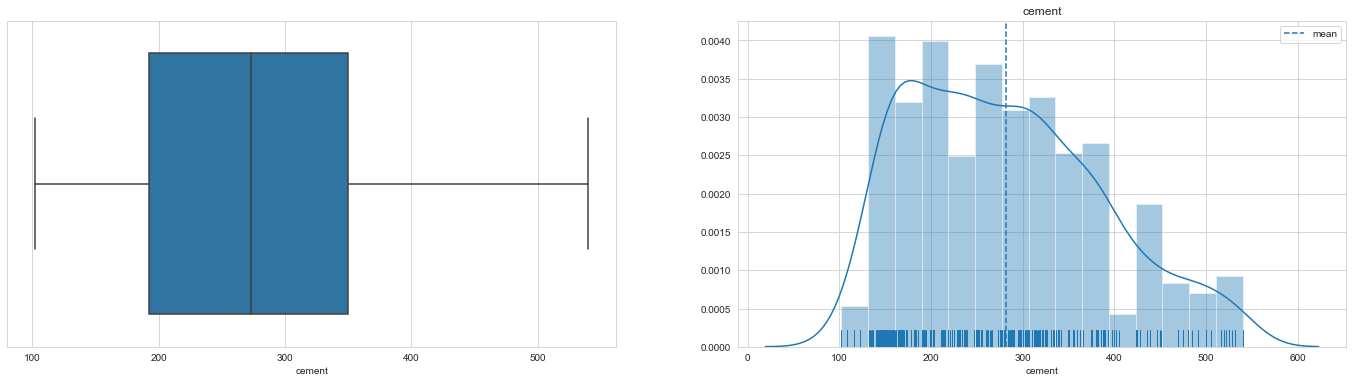

In [11]:
next(feature_analysis)

***   slag      ***
count   1,030.00
mean       73.90
std        86.28
min         0.00
25%         0.00
50%        22.00
75%       142.95
max       359.40
Name: slag, dtype: float64


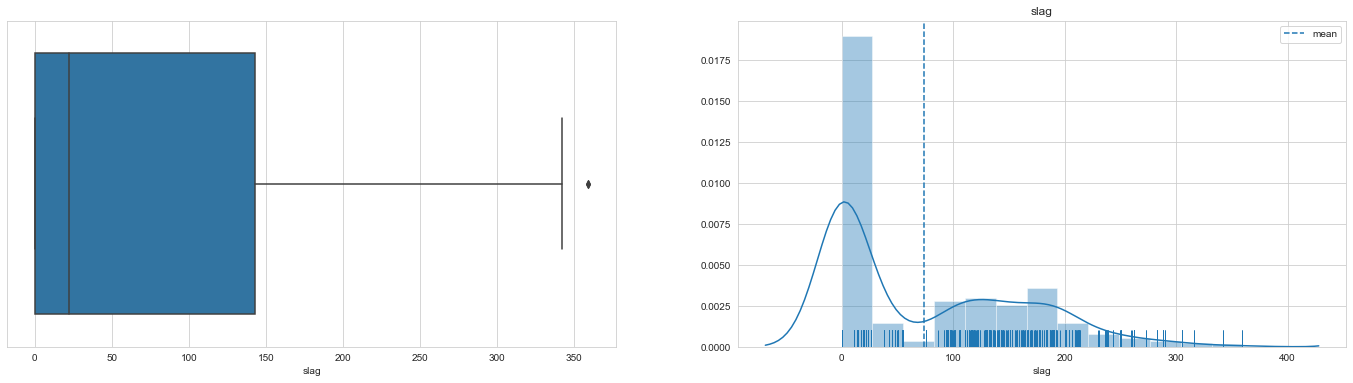

In [12]:
next(feature_analysis)

***   ash      ***
count   1,030.00
mean       54.19
std        64.00
min         0.00
25%         0.00
50%         0.00
75%       118.30
max       200.10
Name: ash, dtype: float64


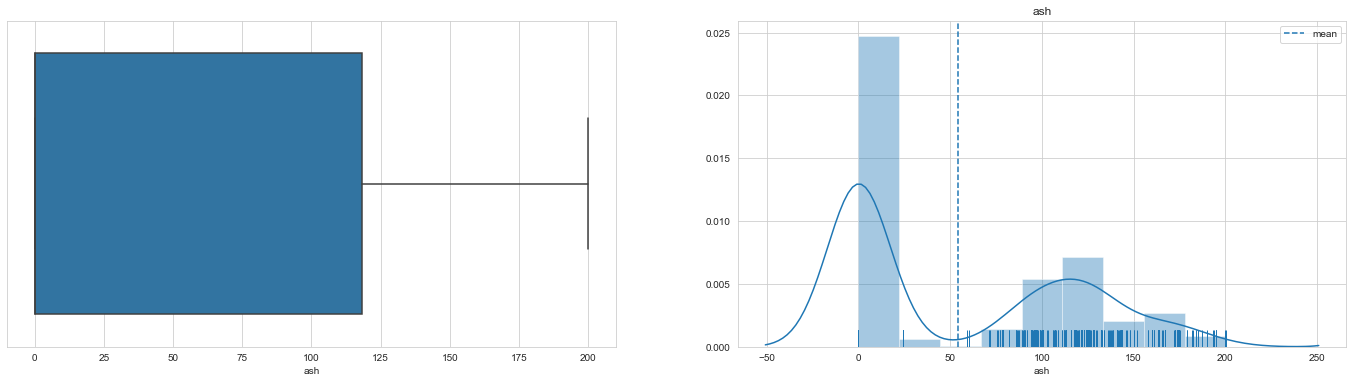

In [13]:
next(feature_analysis)

***   water      ***
count   1,030.00
mean      181.57
std        21.35
min       121.80
25%       164.90
50%       185.00
75%       192.00
max       247.00
Name: water, dtype: float64


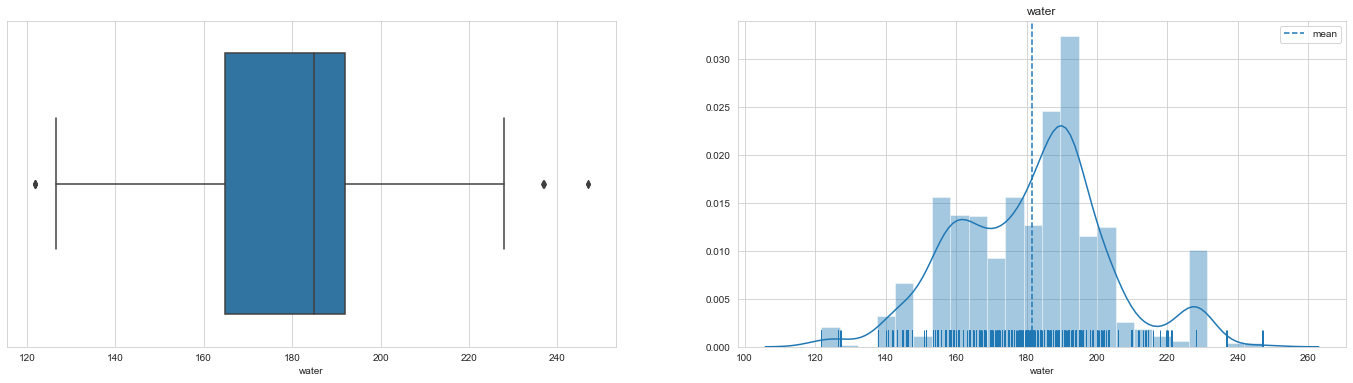

In [14]:
next(feature_analysis)

***   superplastic      ***
count   1,030.00
mean        6.20
std         5.97
min         0.00
25%         0.00
50%         6.40
75%        10.20
max        32.20
Name: superplastic, dtype: float64


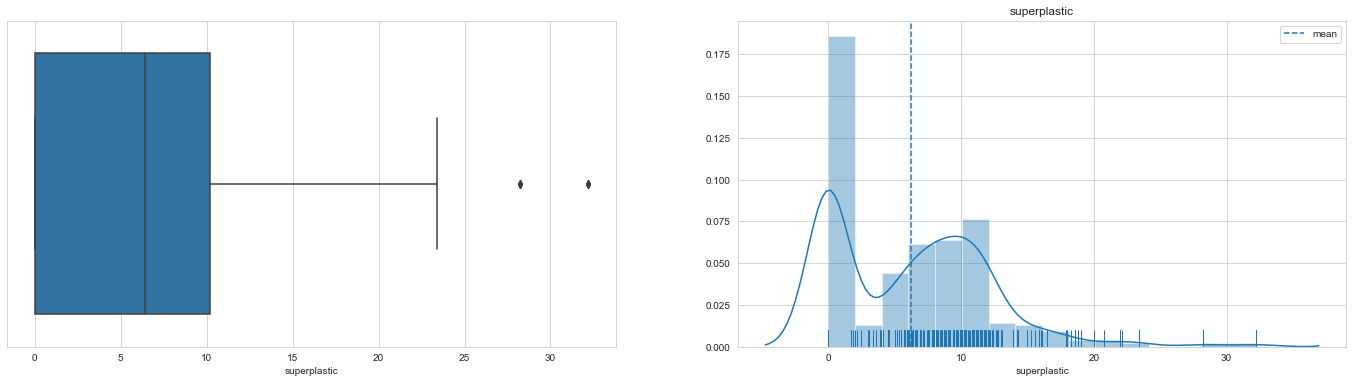

In [15]:
# superplasic
next(feature_analysis)

***   coarseagg      ***
count   1,030.00
mean      972.92
std        77.75
min       801.00
25%       932.00
50%       968.00
75%     1,029.40
max     1,145.00
Name: coarseagg, dtype: float64


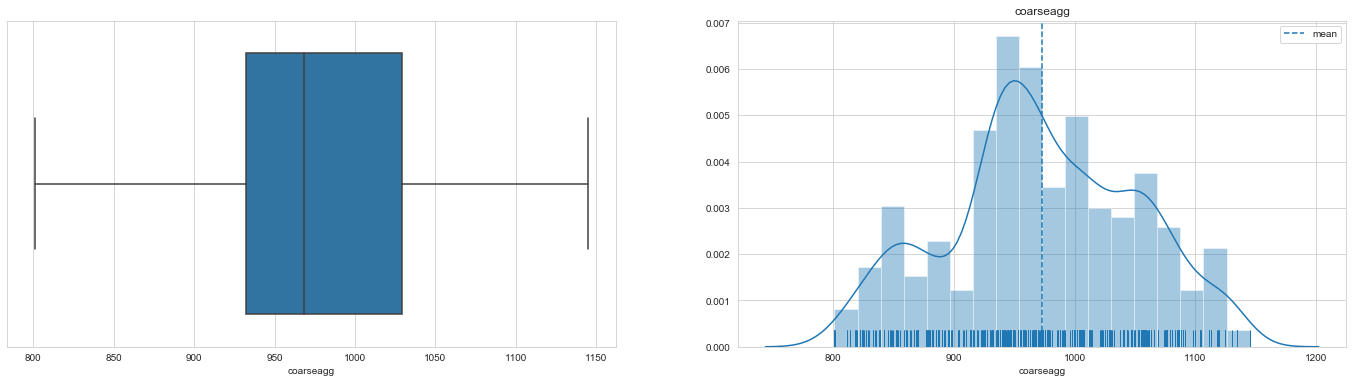

In [16]:
next(feature_analysis)

***   fineagg      ***
count   1,030.00
mean      773.58
std        80.18
min       594.00
25%       730.95
50%       779.50
75%       824.00
max       992.60
Name: fineagg, dtype: float64


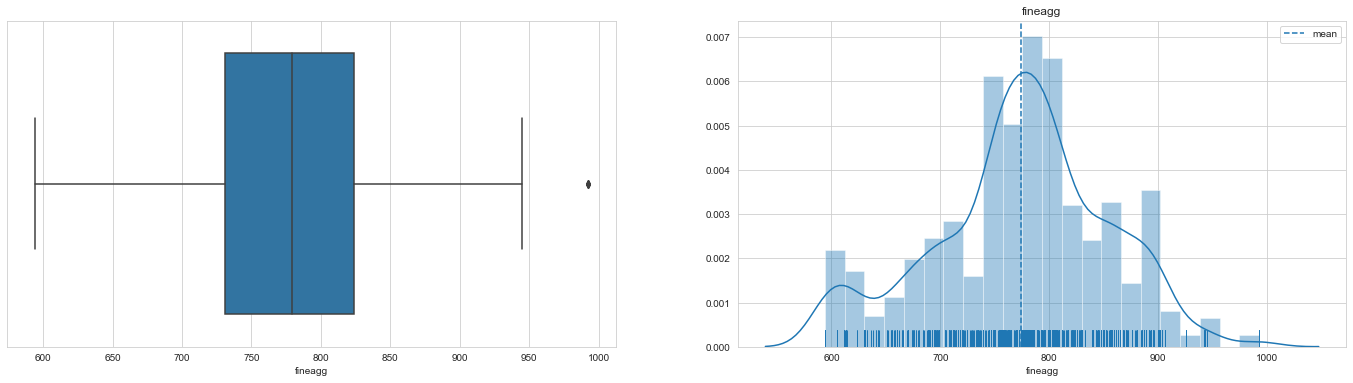

In [17]:
next(feature_analysis)

***   age      ***
count   1,030.00
mean       45.66
std        63.17
min         1.00
25%         7.00
50%        28.00
75%        56.00
max       365.00
Name: age, dtype: float64


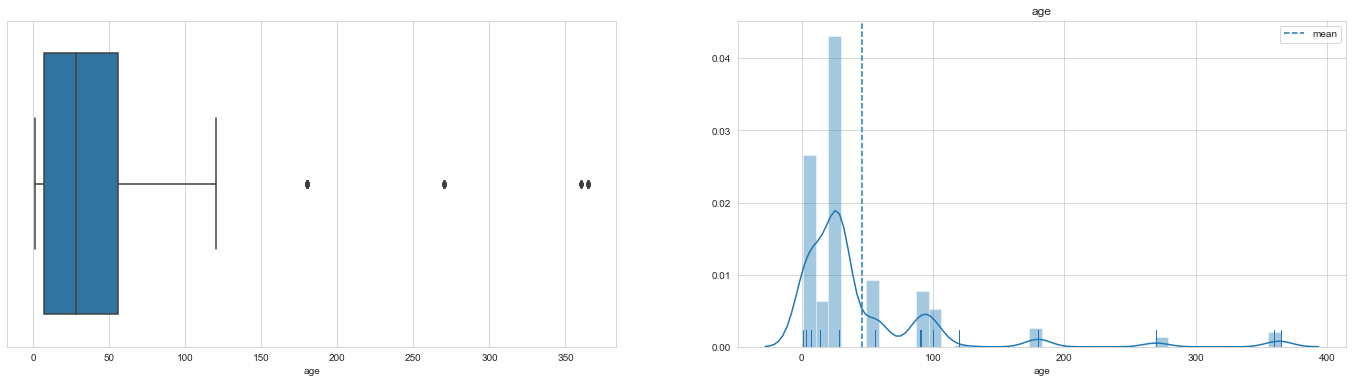

In [18]:
next(feature_analysis) #Age

In [19]:
concrete_df['age'].value_counts(normalize=True,ascending=False, bins=3)


(0.635, 122.333]     0.94
(243.667, 365.0]     0.03
(122.333, 243.667]   0.03
Name: age, dtype: float64

The age is a very skewed. 94% of the records are for are < 122 days.

***   strength      ***
count   1,030.00
mean       35.82
std        16.71
min         2.33
25%        23.71
50%        34.45
75%        46.14
max        82.60
Name: strength, dtype: float64


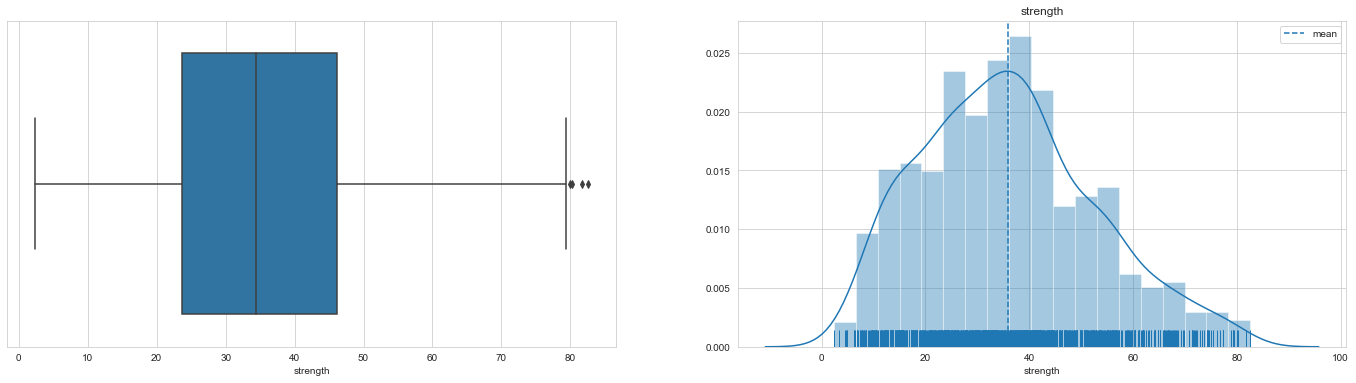

In [20]:
next(feature_analysis)

## Outlier detection and treatment

In [21]:
def list_outliers(df, features):
    for feature in features:
        print(f'***   {feature}      ***')
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        IQR = q3 - q1
        print( f'IQR: {IQR}')
        print(df[df[feature]> q3 + 1.5*IQR])
        yield
cols_numeric  = ['slag','water','superplastic','fineagg','age']
list_outlier = iter(list_outliers(concrete_df,cols_numeric ))

In [22]:
next(list_outlier)

***   slag      ***
IQR: 142.95
     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918  239.60 359.40 0.00 185.70          0.00     941.60   664.30   28   
990  239.60 359.40 0.00 185.70          0.00     941.60   664.30    7   

     strength  
918     39.44  
990     25.42  


In [23]:
next(list_outlier)

***   water      ***
IQR: 27.099999999999994
     cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66   237.00  92.00  71.00 247.00          6.00     853.00   695.00   28   
263  236.90  91.70  71.50 246.90          6.00     852.90   695.40   28   
740  140.00 164.00 128.00 237.00          6.00     869.00   656.00   28   
826  139.70 163.90 127.70 236.70          5.80     868.60   655.60   28   

     strength  
66      28.63  
263     28.63  
740     35.23  
826     35.23  


In [24]:
next(list_outlier)

***   superplastic      ***
IQR: 10.2
      cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44    531.30   0.00 0.00 141.80         28.20     852.10   893.70   91   
156   531.30   0.00 0.00 141.80         28.20     852.10   893.70   28   
232   469.00 117.20 0.00 137.80         32.20     852.10   840.50   56   
292   469.00 117.20 0.00 137.80         32.20     852.10   840.50   91   
538   531.30   0.00 0.00 141.80         28.20     852.10   893.70    7   
744   469.00 117.20 0.00 137.80         32.20     852.10   840.50    7   
816   469.00 117.20 0.00 137.80         32.20     852.10   840.50   28   
838   531.30   0.00 0.00 141.80         28.20     852.10   893.70   56   
955   469.00 117.20 0.00 137.80         32.20     852.10   840.50    3   
1026  531.30   0.00 0.00 141.80         28.20     852.10   893.70    3   

      strength  
44       59.20  
156      56.40  
232      69.30  
292      70.70  
538      46.90  
744      54.90  
816      66.90  
838      58

In [25]:
next(list_outlier)

***   fineagg      ***
IQR: 93.05000000000007
     cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129  375.00 93.80 0.00 126.60         23.40     852.10   992.60   91     62.50
447  375.00 93.80 0.00 126.60         23.40     852.10   992.60    7     45.70
504  375.00 93.80 0.00 126.60         23.40     852.10   992.60    3     29.00
584  375.00 93.80 0.00 126.60         23.40     852.10   992.60   56     60.20
857  375.00 93.80 0.00 126.60         23.40     852.10   992.60   28     56.70


In [26]:
next(list_outlier)


***   age      ***
IQR: 49.0
      cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51    331.00   0.00 0.00 192.00          0.00     978.00   825.00  180   
64    332.50 142.50 0.00 228.00          0.00     932.00   594.00  365   
93    427.50  47.50 0.00 228.00          0.00     932.00   594.00  180   
99    237.50 237.50 0.00 228.00          0.00     932.00   594.00  180   
103   380.00   0.00 0.00 228.00          0.00     932.00   670.00  180   
133   236.00   0.00 0.00 193.00          0.00     968.00   885.00  365   
144   302.00   0.00 0.00 203.00          0.00     974.00   817.00  180   
149   380.00  95.00 0.00 228.00          0.00     932.00   594.00  270   
152   322.00   0.00 0.00 203.00          0.00     974.00   800.00  180   
157   198.60 132.40 0.00 192.00          0.00     978.40   825.50  360   
159   304.00  76.00 0.00 228.00          0.00     932.00   670.00  365   
198   266.00 114.00 0.00 228.00          0.00     932.00   670.00  365   
199   277

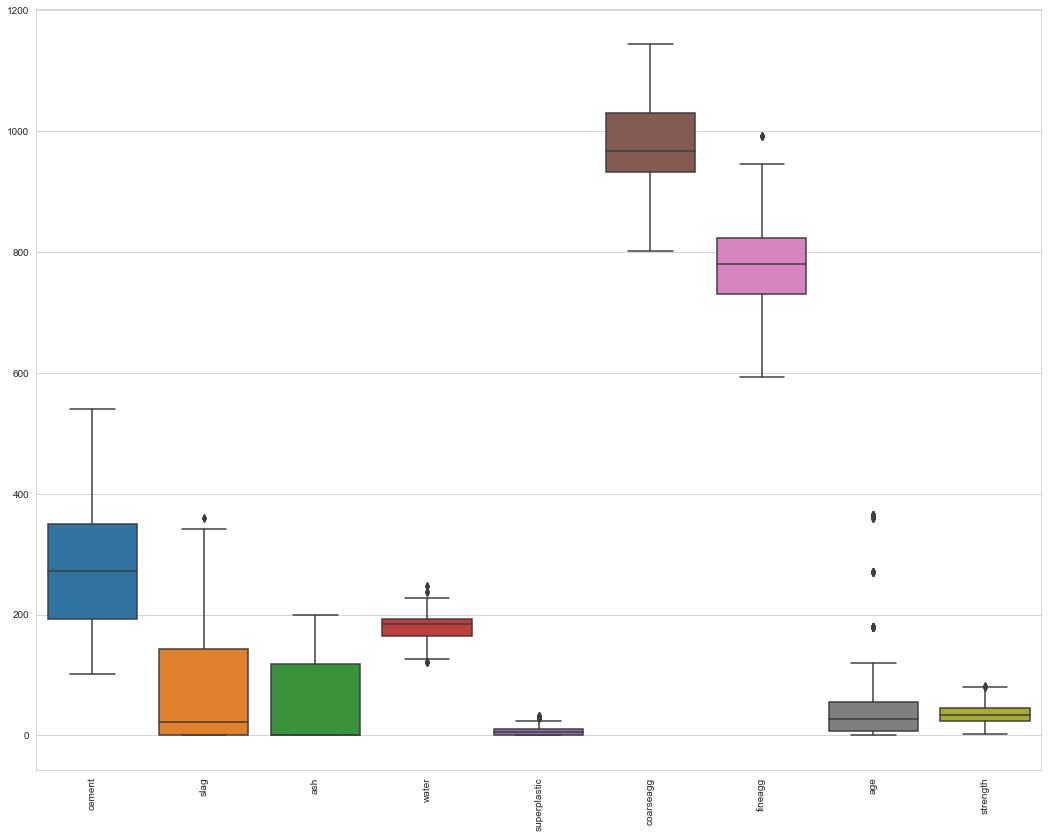

In [27]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=concrete_df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

* Although there are outliers but the data seems clean and consistent
* Age has the most outliers - but is still bounded by 365 and 0 so no need to fix

## Bi-variate analysis

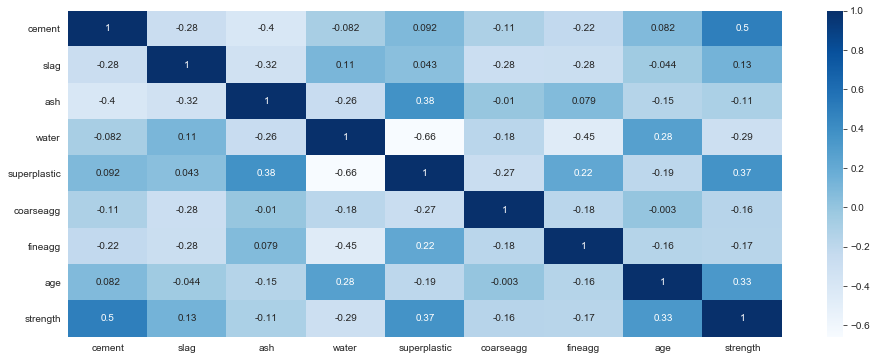

In [28]:
#correlation
plt.figure(figsize=(16, 6))
corr = concrete_df.corr() 
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2g')

* superplastic + water has a negative correlation of -.66
* superplastic + ( ash , fine agg) as a positive correlation of 0.38
* Strength and cement 0.5 positive correlated - makes sense as more cement more strength

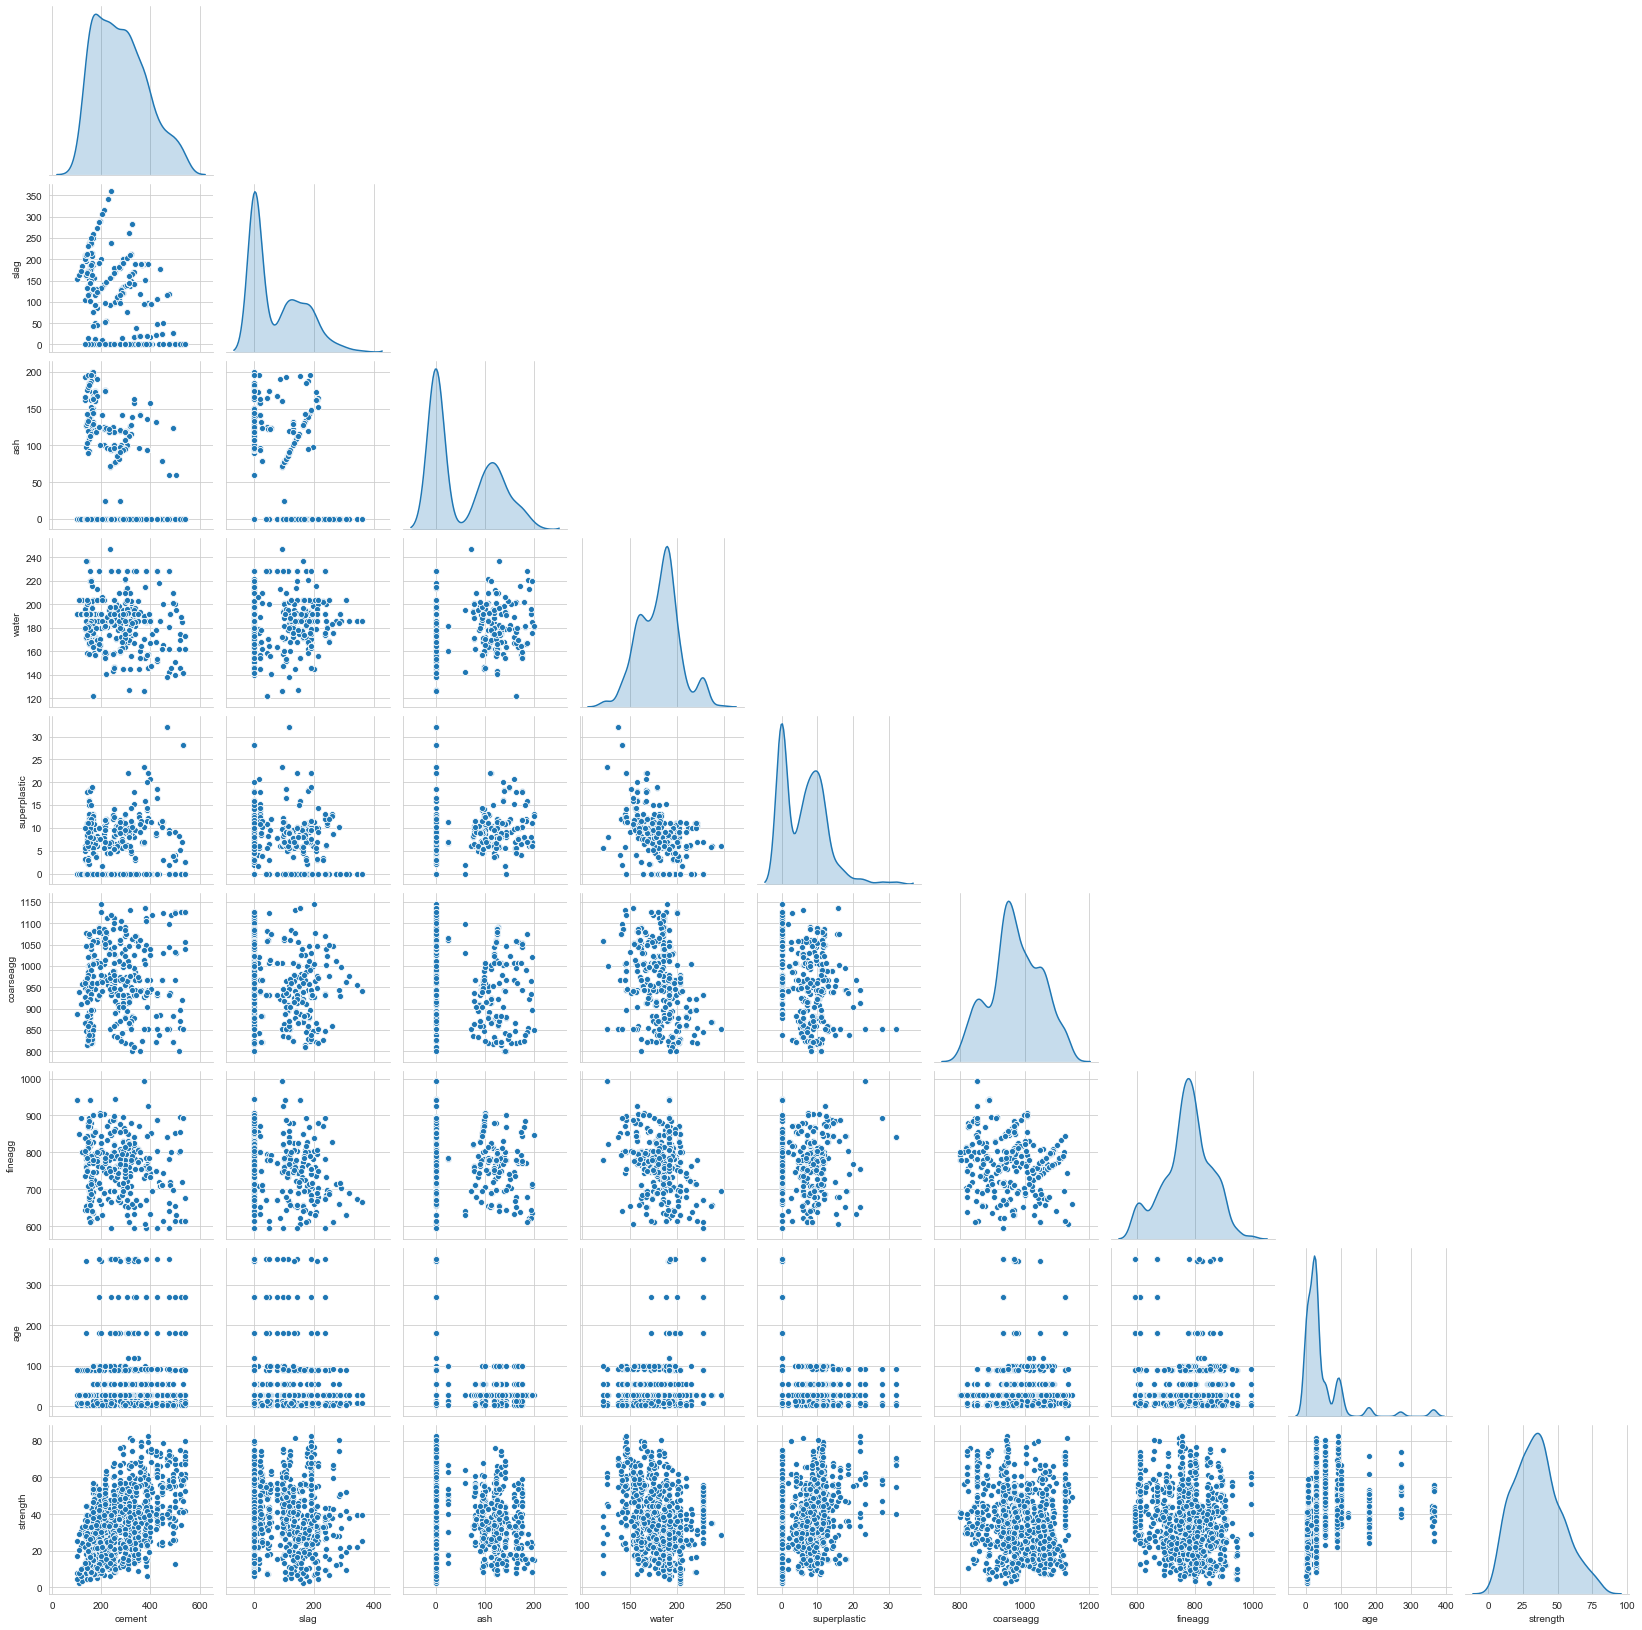

In [29]:
sns.pairplot(concrete_df,corner = True,  diag_kind='kde')

* slag has lots of enteries with 0
* Strength does not show any significant relationship with other independent attributes except cement and superplastic


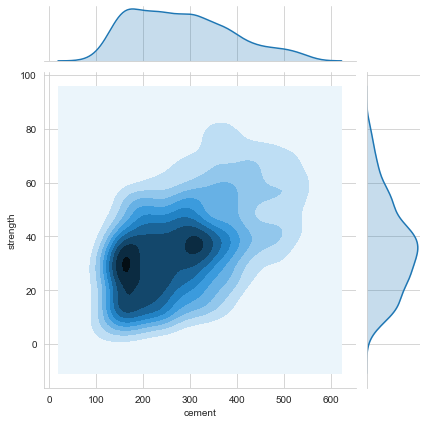

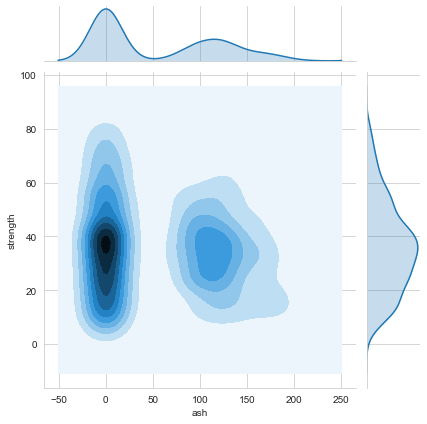

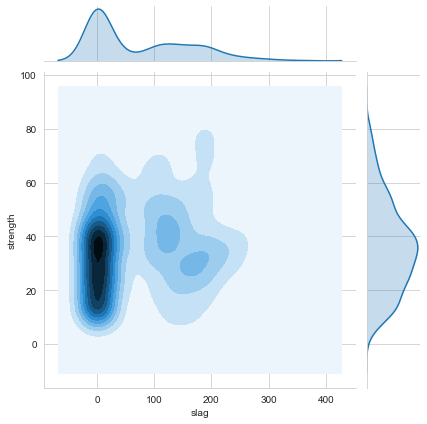

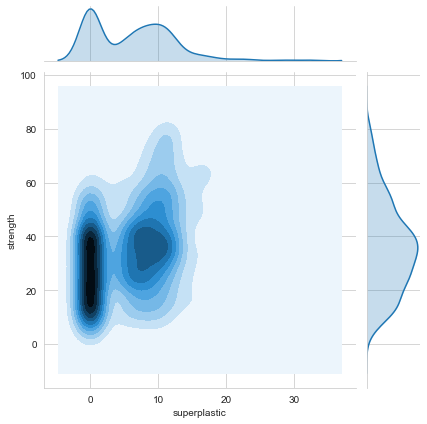

In [30]:
# kde plots just to check multi gaussian nature of some variables
sns.jointplot(x='cement',y='strength', kind='kde',data=concrete_df )
sns.jointplot(x='ash',y='strength', kind='kde',data=concrete_df )
sns.jointplot(x='slag',y='strength', kind='kde',data=concrete_df )
sns.jointplot(x='superplastic',y='strength', kind='kde',data=concrete_df )


Superplastic is bimodal
slag seems trimodal
ash is clearly bimodal
strength and cement are clearly positively correlated

* 


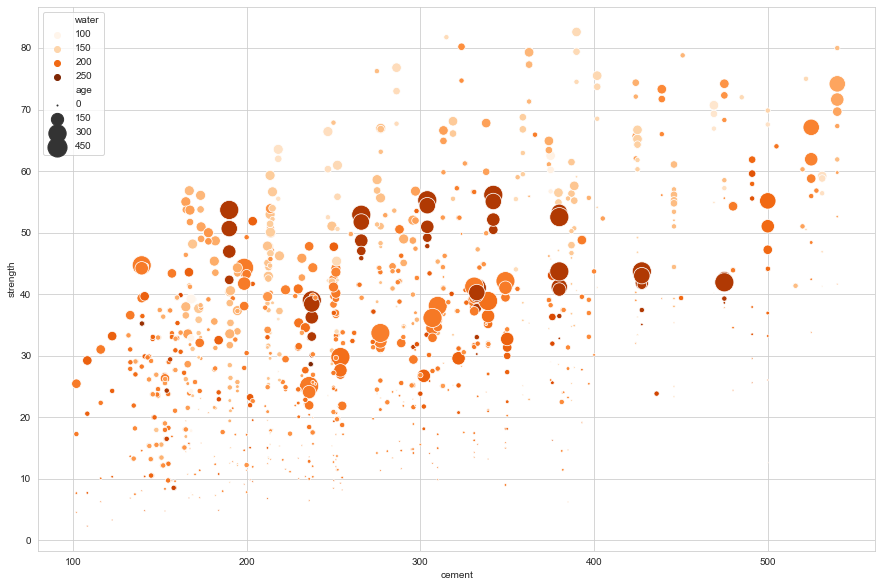

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=concrete_df, sizes=(1, 365),palette="Oranges")

* At any cement and  water level - with age the strength increases ( same color circle increases along y axis)
    
* More Water for same age and cement level - leads to more strength ( dark color, same size higher in y axis), BUT there seems to a relation that for smaller number of days - less water leads to more strength ( smaller circles , lighter color on top



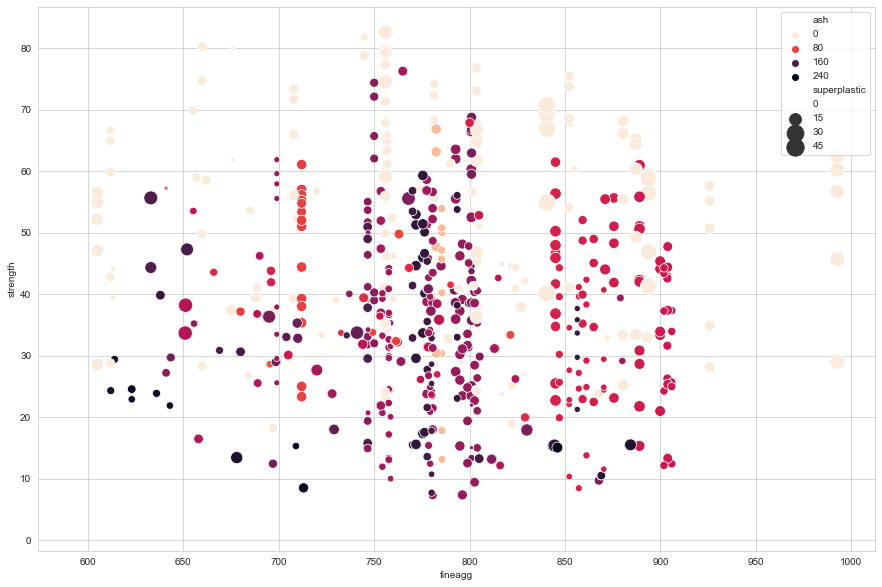

In [32]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y="strength", x="fineagg", hue="ash",size="superplastic",data=concrete_df,palette="rocket_r", sizes=(0,300))

less ash more strength;
more superplastic more strength


##    3. Feature Engineering techniques

In [33]:
# adding a ratio of all positive correlated to all negative correlated
df_features = concrete_df.copy()
df_features['corr_ratio'] =  ( df_features.cement + df_features.slag + df_features.superplastic )  /  ( df_features.ash + df_features.water + df_features.coarseagg  + df_features.fineagg)

In [34]:
#making sure no #na when denom is zero
df_features.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
corr_ratio      0
dtype: int64

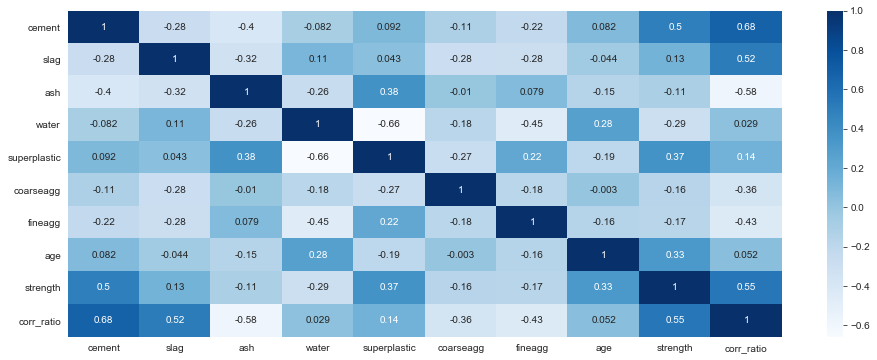

In [35]:
#correlation
plt.figure(figsize=(16, 6))
corr = df_features.corr() 
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2g')
# new ratio has a positive corelation 

In [36]:
# adding polynomical of degree 2 
# since the relation can be non linear 
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree = 2,include_bias = False)
poly2x = poly2.fit_transform(df_features.drop('strength',axis=1))
df_poly2= pd.DataFrame(poly2x,columns=['poly_'+str(x) for x in range(poly2x.shape[1])])

#remove the first 9 columns as they are just one degree
df_poly2= df_poly2.iloc[:,9:]

print(f'Polynomical shape : {df_poly2.shape}')

df_features = df_features.join(df_poly2)
print(f'Joined Polynomical shape : {df_features.shape}')


Polynomical shape : (1030, 45)
Joined Polynomical shape : (1030, 55)


In [37]:
### also lets save a map of descriptive names
descriptive_names_list = poly2.get_feature_names(df_features.drop('strength',axis=1).columns)

descriptive_names_map = {}
for i in range(9):
    descriptive_names_map[descriptive_names_list[i]] = descriptive_names_list[i]
for i in range(9,len(descriptive_names_list)):
    descriptive_names_map['poly_' + str(i)] = descriptive_names_list[i]

print(descriptive_names_map)   
    

{'cement': 'cement', 'slag': 'slag', 'ash': 'ash', 'water': 'water', 'superplastic': 'superplastic', 'coarseagg': 'coarseagg', 'fineagg': 'fineagg', 'age': 'age', 'corr_ratio': 'corr_ratio', 'poly_9': 'cement^2', 'poly_10': 'cement slag', 'poly_11': 'cement ash', 'poly_12': 'cement water', 'poly_13': 'cement superplastic', 'poly_14': 'cement coarseagg', 'poly_15': 'cement fineagg', 'poly_16': 'cement age', 'poly_17': 'cement corr_ratio', 'poly_18': 'slag^2', 'poly_19': 'slag ash', 'poly_20': 'slag water', 'poly_21': 'slag superplastic', 'poly_22': 'slag coarseagg', 'poly_23': 'slag fineagg', 'poly_24': 'slag age', 'poly_25': 'slag corr_ratio', 'poly_26': 'ash^2', 'poly_27': 'ash water', 'poly_28': 'ash superplastic', 'poly_29': 'ash coarseagg', 'poly_30': 'ash fineagg', 'poly_31': 'ash age', 'poly_32': 'ash corr_ratio', 'poly_33': 'water^2', 'poly_34': 'water superplastic', 'poly_35': 'water coarseagg', 'poly_36': 'water fineagg', 'poly_37': 'water age', 'poly_38': 'water corr_ratio', 

In [38]:
# lets do a quick Lasso regression to weed out insignificant Polynomical + ratio features

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso

X = df_features.drop('strength',axis=1)
y = df_features['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lasso = Lasso() 
lasso.fit(X_train,y_train)

poly_zero = X_train.columns[lasso.coef_==0].tolist() 
poly_zero = [i for i in poly_zero if 'poly_' in i] 

print(f'Lasso  zero polynomial : {len(poly_zero)} {poly_zero}')

df_features = df_features.drop(axis =1 , columns = poly_zero )

print(f'New (non Zero) Polynomical shape : {df_features.shape}')


Lasso  zero polynomial : 9 ['poly_17', 'poly_25', 'poly_32', 'poly_38', 'poly_43', 'poly_47', 'poly_50', 'poly_52', 'poly_53']
New (non Zero) Polynomical shape : (1030, 46)


In [39]:
df_features.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,corr_ratio,...,poly_39,poly_40,poly_41,poly_42,poly_44,poly_45,poly_46,poly_48,poly_49,poly_51
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,0.18,...,0.00,0.00,0.00,0.00,"944,395.24","727,392.30","27,210.40","560,252.25","20,958.00",784.00
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,0.10,...,116.64,"11,672.64","8,598.96",151.20,"1,168,128.64","860,532.96","15,131.20","633,934.44","11,146.80",196.00
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,0.12,...,30.25,"5,262.95","4,736.60",154.00,"915,657.61","824,082.28","26,793.20","741,665.44","24,113.60",784.00
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,0.21,...,0.00,0.00,0.00,0.00,"868,624.00","624,440.00","26,096.00","448,900.00","18,760.00",784.00
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,0.18,...,82.81,"9,531.34","6,339.97",254.80,"1,097,046.76","729,723.58","29,327.20","485,390.89","19,507.60",784.00


At this point we have 
* df_features - the datset with poly and ratio
* concrete_df - the orginial dataset



We will use the following 

    Linear
    Linear with  Lasso 
    Linear with Ridge
    Decision Tree 

    Random Forest 
    Bagging 
    Gradient Boost 
    Adaboost 
    
First we will use teh original datset and store the results
Next we will use the new features and store the result


In [40]:
# dataframe to store results
results = pd.DataFrame({'Dataset':[],'Model':[],'ExplainedVariance':[],'stddev':[]})
saved_models =dict() # model|dataset -> model

#preparing datasets
datasets = dict()
X = concrete_df.drop('strength',axis=1)
y = concrete_df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
datasets['original'] = (X_train, X_test, y_train, y_test)


X = df_features.drop('strength',axis=1)
y = df_features['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
datasets['modified'] = (X_train, X_test, y_train, y_test)



In [41]:
# We will create pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('Linear',Pipeline([('md',LinearRegression())])))
pipelines.append(('Linear Lasso',Pipeline([('scaler',MinMaxScaler ()),('md',Lasso())])))
pipelines.append(('Linear Ridge',Pipeline([('scaler',MinMaxScaler ()),('md',Ridge())])))
pipelines.append(('DecisionTree',Pipeline([('scaler',MinMaxScaler ()),('md',DecisionTreeRegressor())])))
pipelines.append(('RandomForest',Pipeline([('scaler',MinMaxScaler ()),('md',RandomForestRegressor())])))
pipelines.append(('Bagging',Pipeline([('scaler',MinMaxScaler ()),('md',BaggingRegressor())])))
pipelines.append(('Adaboost',Pipeline([('scaler',MinMaxScaler ()),('md',AdaBoostRegressor())])))
pipelines.append(('Gradient',Pipeline([('scaler',MinMaxScaler ()),('md',GradientBoostingRegressor())])))

In [42]:
# we will use kfold 10 

for data_name , (X_train, X_test, y_train, y_test) in datasets.items():
    for reg_name , pipe in pipelines:
        cv_score = cross_val_score(pipe, X_train, y_train, cv=10, scoring = 'explained_variance')
        new_row = {'Dataset':data_name,'Model':reg_name,'ExplainedVariance':cv_score.mean()*100,'stddev':cv_score.std()*100}
        results = results.append(new_row, ignore_index=True)
        saved_models[ data_name + reg_name ] =pipe
          
results.sort_values(by=['ExplainedVariance'], inplace = True)



In [43]:
results

,Dataset,Model,ExplainedVariance,stddev
1,original,Linear Lasso,19.93,2.87
9,modified,Linear Lasso,26.65,3.59
2,original,Linear Ridge,58.90,6.41
0,original,Linear,59.14,7.23
10,modified,Linear Ridge,75.35,4.17
8,modified,Linear,77.33,4.98
6,original,Adaboost,78.86,3.11
3,original,DecisionTree,81.92,5.21
14,modified,Adaboost,83.05,3.99
11,modified,DecisionTree,83.84,4.58


* Linear models did  very bad
* Ensemble methods did better
* modified dataset with engineered features did better 
* GradientBoost on modified dataset seems to be the best at 91.42 and the least std dev

In [44]:
#study teh features of the best fit

X_train, X_test, y_train, y_test = datasets['modified']

df_importance =pd.DataFrame({'Features':[], 'Importance':[]})
pipe_gb = saved_models["modifiedGradient"].fit(X_train,y_train)

df_importance['Features'] = X_train.columns
df_importance['Importance'] = pipe_gb.steps[1][1].feature_importances_
df_importance.sort_values(by='Importance', ascending=False, inplace = True)

df_importance = df_importance[df_importance.Importance>=0.01]

df_importance.head(20)

,Features,Importance
16,poly_16,0.52
8,corr_ratio,0.19
33,poly_36,0.05
13,poly_13,0.05
20,poly_21,0.03
32,poly_35,0.02
38,poly_42,0.02
3,water,0.02
30,poly_33,0.02


In [45]:
#lets test on only the important features and see if this can be improved
X_train = X_train[ df_importance.Features.to_list() ]
X_test = X_test[ df_importance.Features.to_list() ]

X_train.head()

,poly_16,corr_ratio,poly_36,poly_13,poly_21,poly_35,poly_42,water,poly_33
185,"4,900.00",0.18,"157,325.00",0.00,0.00,"197,722.00",0.00,203.00,"41,209.00"
286,"34,034.00",0.31,"128,714.67","3,777.40","1,910.92","157,529.61",919.10,170.10,"28,934.01"
600,831.00,0.14,"163,496.00",0.00,0.00,"184,888.00",0.00,191.00,"36,481.00"
691,"2,660.00",0.27,"135,432.00",0.00,0.00,"212,496.00",0.00,228.00,"51,984.00"
474,"9,968.00",0.19,"150,154.00","3,916.00",0.00,"154,593.00",308.00,193.00,"37,249.00"


In [46]:
from sklearn.metrics import explained_variance_score
datasets['important'] = (X_train, X_test, y_train, y_test)

pipe_gb = saved_models["modifiedGradient"].fit(X_train,y_train)
y_train_predict = pipe_gb.predict(X_train)
y_test_predict = pipe_gb.predict(X_test)

print(f' Train score : {explained_variance_score(y_train,y_train_predict)} ')
print(f' Test score : {explained_variance_score(y_test,y_test_predict)} ')

print(pipe_gb)




 Train score : 0.9562041922318661 
 Test score : 0.9030704523706413 
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('md',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_n

## Hyperparam tuning

### Using the GradientBoost only on reduced features set

* n_estimators represents the number of trees in the forest
* learning rate shrinks the contribution of each tree by learning_rate
* max_depth. This indicates how deep the built tree can be



In [47]:
from sklearn.model_selection import GridSearchCV

pipe_gb = saved_models["modifiedGradient"]
pipe_gb.get_params().keys()

#GBR=GradientBoostingRegressor()
search_grid={'md__n_estimators':[75,100,150]
             ,'md__learning_rate':[.01,0.1,.2]
             ,'md__max_depth':[1,2,3,4]
            }

search=GridSearchCV(estimator=pipe_gb,param_grid=search_grid,scoring='explained_variance',n_jobs=1,cv=10)

search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('md',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  ccp_alpha=0.0,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=None,
                            

In [48]:
print(f'Best Params : {search.best_params_}')
best_param = search.best_params_

Best Params : {'md__learning_rate': 0.2, 'md__max_depth': 4, 'md__n_estimators': 150}


In [49]:
#create best pipeline
GBR = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 4, n_estimators=150)
best_pipe = Pipeline([('scaler',MinMaxScaler ()),('md',GBR)])

(X_train, X_test, y_train, y_test) = datasets['important']

pipe_gb = best_pipe.fit(X_train,y_train)
y_train_predict = pipe_gb.predict(X_train)
y_test_predict = pipe_gb.predict(X_test)

print(f'Train score : {explained_variance_score(y_train,y_train_predict)} ')
print(f'Test score : {explained_variance_score(y_test,y_test_predict)} ')

print(pipe_gb)


Train score : 0.9922082096044829 
Test score : 0.9161789708026344 
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('md',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.2, loss='ls',
                                           max_depth=4, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=150,
                                           n_iter_no_

In [50]:
df_importance =pd.DataFrame({'Features':[], 'Importance':[]})
df_importance['Features'] = X_train.columns
df_importance['Importance'] = pipe_gb.steps[1][1].feature_importances_
df_importance.sort_values(by='Importance', ascending=False, inplace = True)
df_importance['Feature_desc'] =  df_importance.Features.map(descriptive_names_map)

df_importance

,Features,Importance,Feature_desc
0,poly_16,0.55,cement age
1,corr_ratio,0.20,corr_ratio
2,poly_36,0.06,water fineagg
3,poly_13,0.04,cement superplastic
5,poly_35,0.04,water coarseagg
6,poly_42,0.04,superplastic age
4,poly_21,0.03,slag superplastic
7,water,0.02,water
8,poly_33,0.02,water^2


* The Best Model is GradientBoost Model with 92.15% score
* The Model is based on polynomial ( max degree 2) features and a corr_ratio feature defined as 
 
 corr _ratio = ( cement + slag + superplastic )  /  ( ash + water + coarseagg  + fineagg)
 
* Among the polynomial cement * age is the most important. and this was also interpretted during EDA
